## Seabornによる可視化
[リファレンス](https://seaborn.pydata.org/index.html)
### Seaborn対Matplotlib
ランダムウォークの例を、Matplotlibの従来書式と色を使って描画する。

In [2]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
# ランダムウォークのデータを作成
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

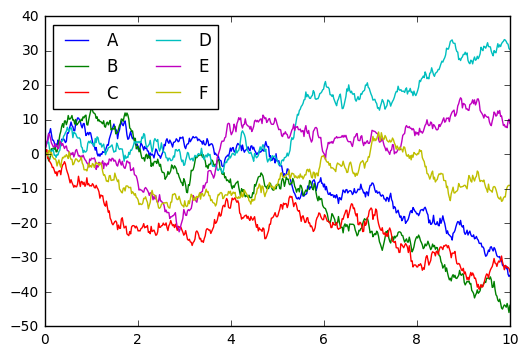

In [4]:
# Matplolibのデフォルトでプロットする。
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [9]:
import seaborn as sns
sns.set() # seabornスタイルの設定

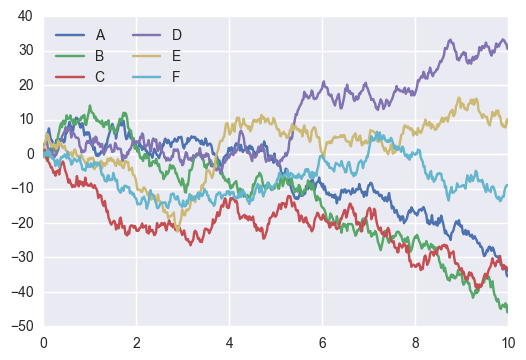

In [10]:
# 同じプロットコード
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

### Seabornプロットの探索
#### ヒストグラム、KDE、密度

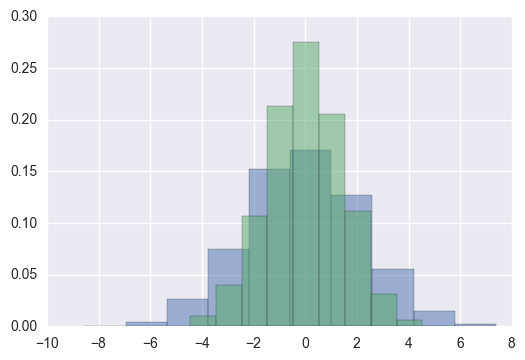

In [11]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

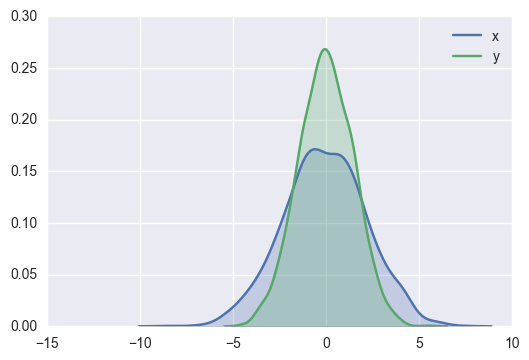

In [14]:
# seabornのsns.kdeplotを使ったカーネル密度推定により、分布の滑らかな推定が可能
for col in 'xy':
    sns.kdeplot(data[col], shade=True)
    plt.ylim([0, 0.30])

(0, 0.3)

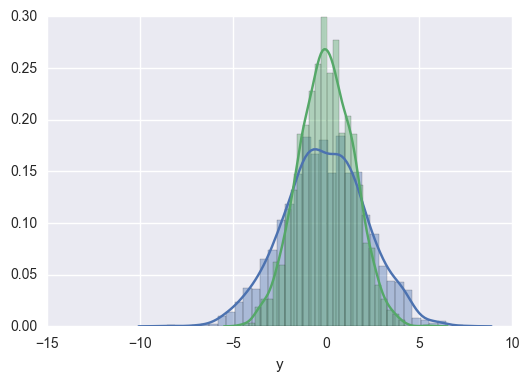

In [16]:
# distplotを使うと、KDEとヒストグラムを同時に描画できる
sns.distplot(data['x'])
sns.distplot(data['y'])
plt.ylim([0, 0.3])

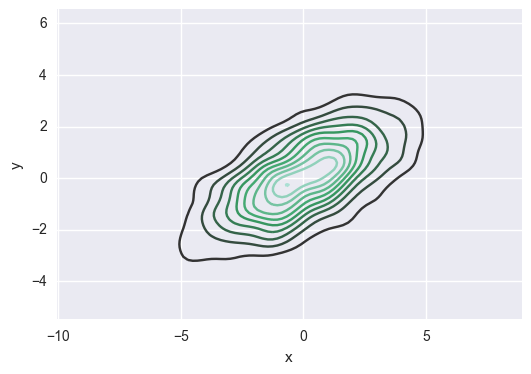

In [18]:
# ２次元のデータセットを渡すと２次元の可視化が行われる。
sns.kdeplot(data['x'], data['y'])

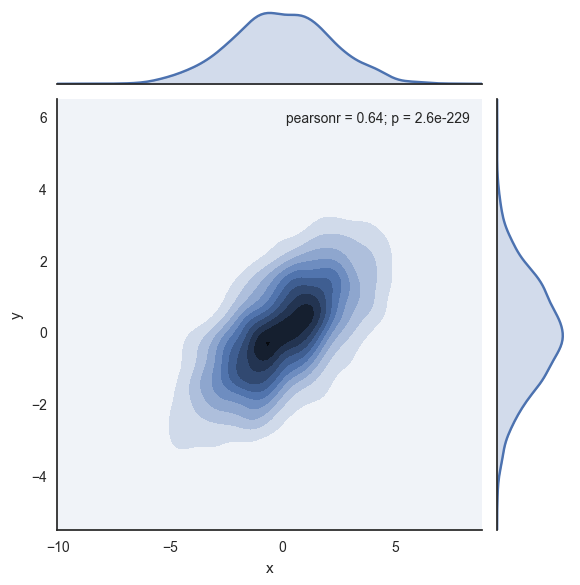

In [19]:
# sns.joinplotを使用して、結合分布と周辺分布を同時に描画できる
with sns.axes_style('white'): # 背景を白に設定する
    sns.jointplot("x", "y", data, kind='kde')

**kindのその他のオプション**<br>

* scatter：散布図
* reg：散布図と回帰直線
* resid：残差
* kde：カーネル密度
* hex：六角形のグリッドのヒストグラム

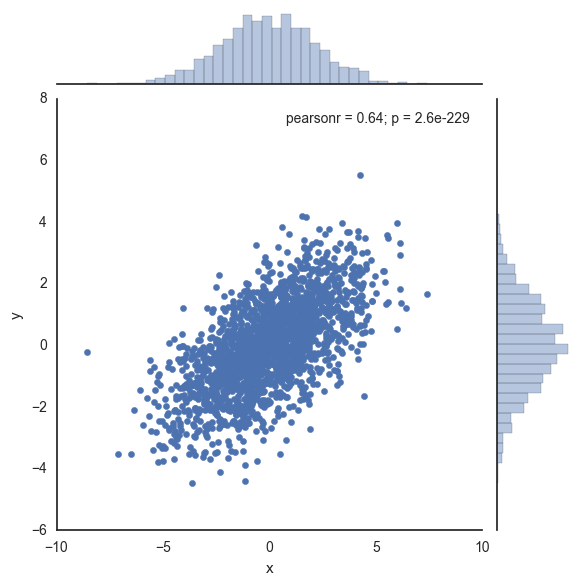

In [23]:
with sns.axes_style('white'): # 背景を白に設定する
    sns.jointplot("x", "y", data, kind='scatter')

#### ペアプロット
多次元データ間の相関を調べるのに有効<br>
アイリスデータセットを使った例を示す。<br>
[seaborn関数リファレンス](https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot)

In [24]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


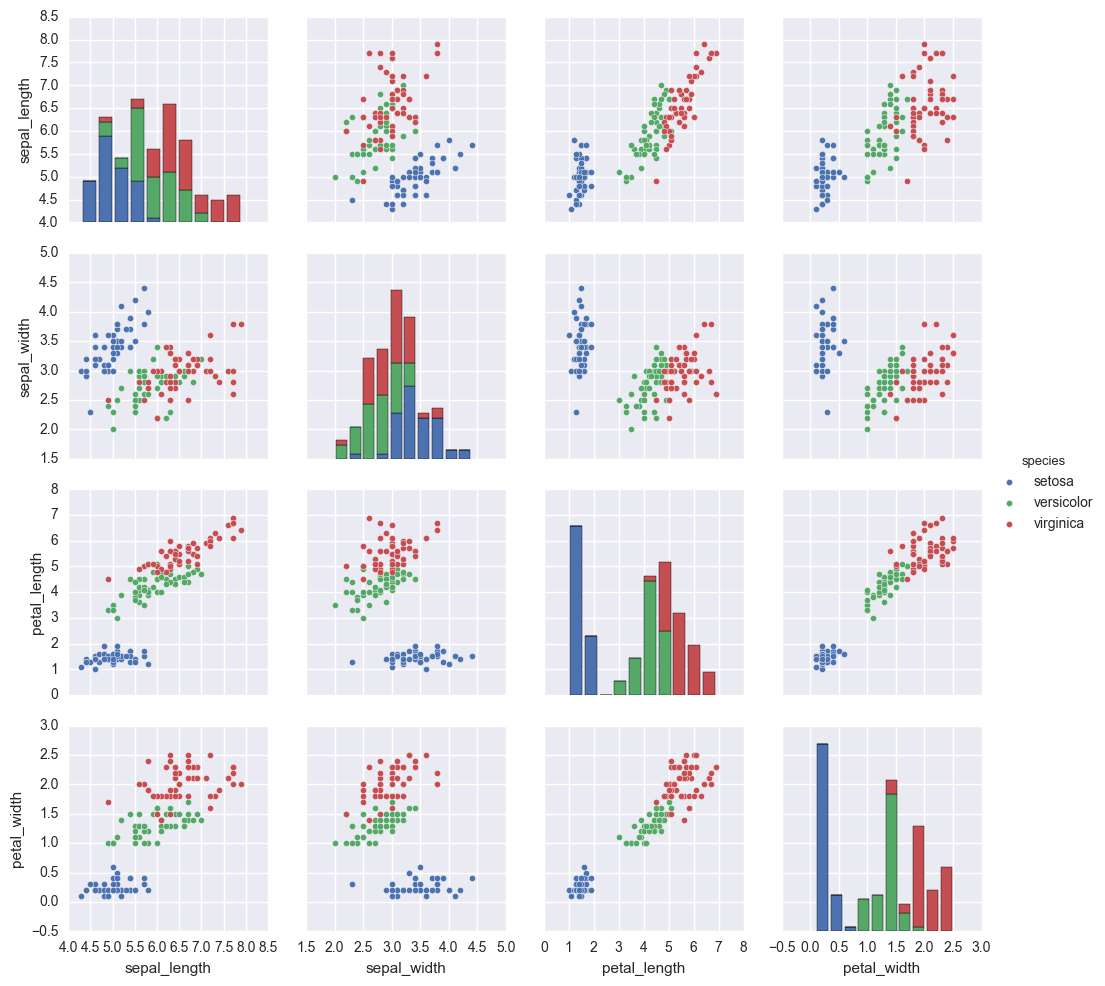

In [25]:
sns.pairplot(iris, hue='species', size=2.5)

#### 層別ヒストグラム
データ全体ではなく、一部のサブセットに対するヒストグラム（層別ヒストグラム：faceted histgram）が有効な場合がある。<br>
レストランスタッフが受け取るチップの額を例にデータを表示する。

In [26]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


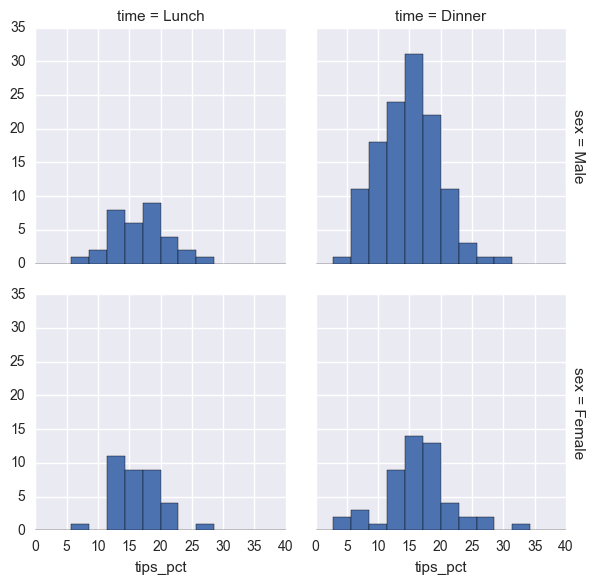

In [28]:
tips['tips_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tips_pct", bins=np.linspace(0, 40, 15))

#### ファクタープロット
あるパラメータで定義されたビン内のパラメータ分布を表示できる。

/Users/takizawatakafumi/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


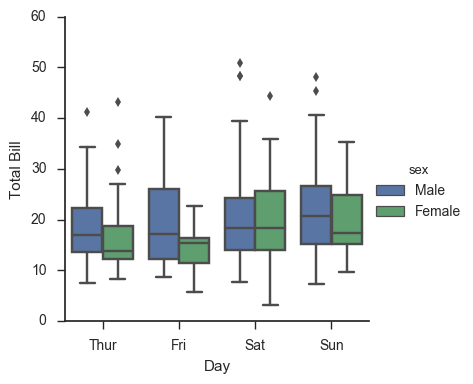

In [29]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill")

#### 結合分布
sns.jointplotを利用して、データセット間の結合分布を関連する周辺分布と共に表示できる。<br>
[jointplot関数リファレンス](https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot)

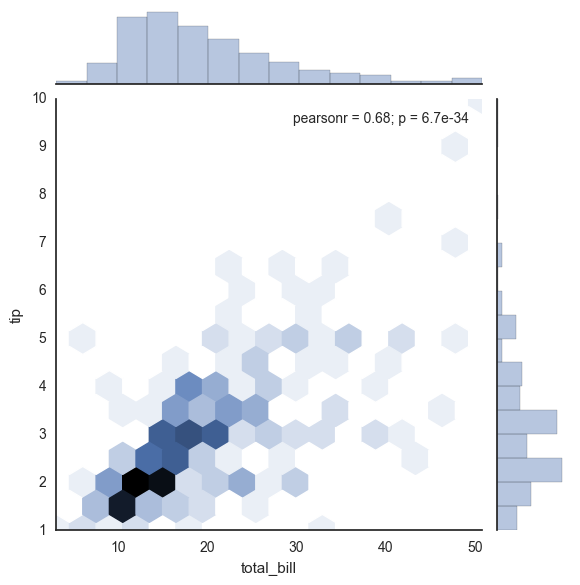

In [30]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

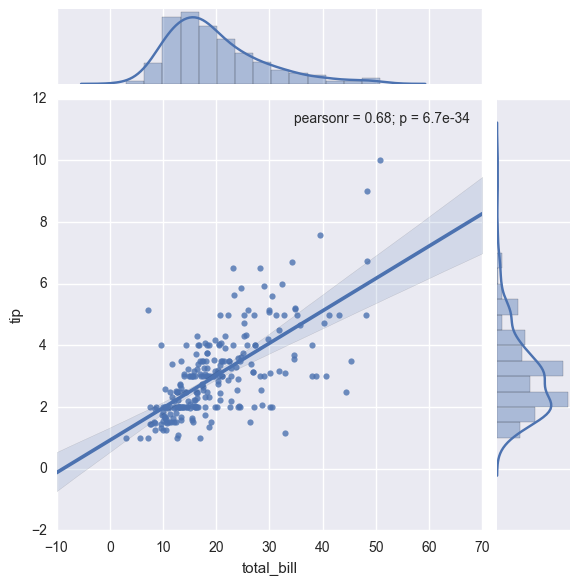

In [31]:
# jointplotはカーネル密度推定と回帰を自動的に行うこともできる
sns.jointplot("total_bill", "tip", data=tips, kind='reg')

#### 棒グラフ
時系列はsns.factorplotでプロットできる。

In [33]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


/Users/takizawatakafumi/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


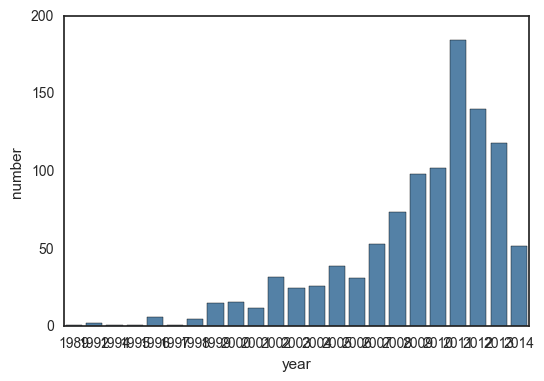

In [63]:
with sns.axes_style('white'):
    # g = sns.factorplot("year", data=planets, aspect=2,
    #                                  kind="count", color='steelblue')
    # g.set_xticklabels(step=5)
    # factorplotは非推奨なのでbarplotを使う
    g = sns.barplot(x = "year", y="number", data=planets, estimator=len, color='steelblue')
    #g.set_xticklabels(step=5)

/Users/takizawatakafumi/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


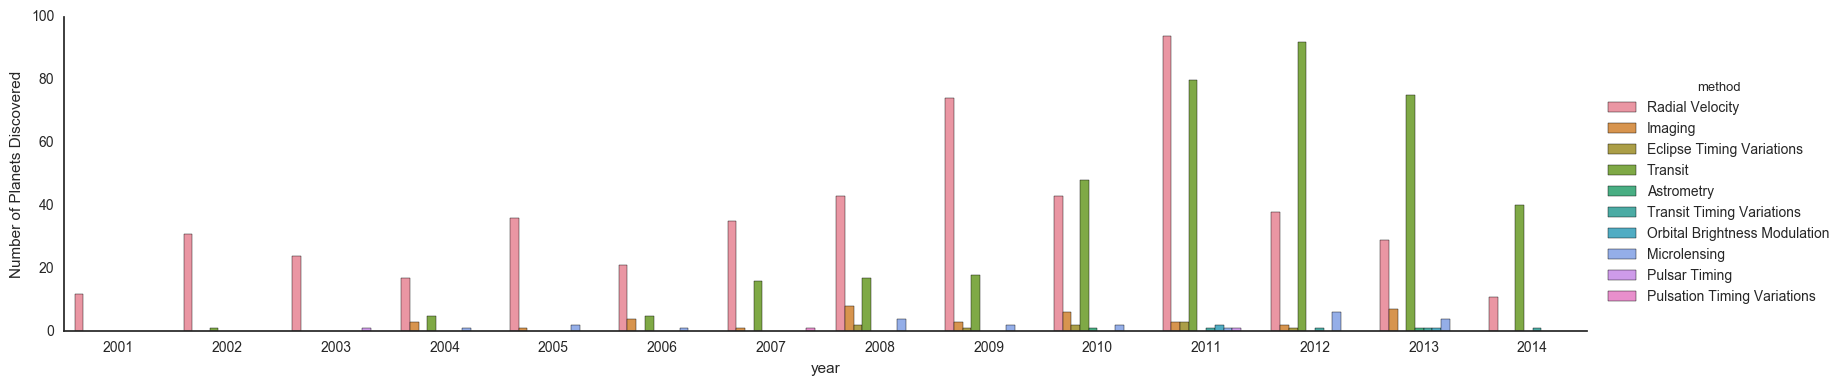

In [64]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                                      hue='method', order=range(2001, 2015))
    g.set_ylabels("Number of Planets Discovered")